In [283]:
#Komal Kumari(MT19124)
#Rupali(MT19095)

# Dataset

Predict Bitcoin price for next 30 days

In [269]:
#import libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing


from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

using BINANCE Exchange API for getting the dataset

In [270]:
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

Fetching dataset for top three cryptocurrency: Bitcoin,Ripple and Ethereum

In [271]:
#Bitcoin
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ripple
symbol='XRPUSDT'
RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ethereum
symbol='ETHUSDT'
ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")

adding columns to the dataset

In [272]:
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
RIP=pd.DataFrame(RIP,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
ETH=pd.DataFrame(ETH,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

Shape of the dataset

In [273]:
print("Shape of the dataset:",BTC.shape)
print("Shape of the dataset:",RIP.shape)
print("Shape of the dataset:",ETH.shape)

Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)


Datatypes information

In [274]:
print("BTC Datatypes:")
print(BTC.dtypes)

BTC Datatypes:
Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Can be ignored                  object
dtype: object


Open time and close time was converted to date-time format from String 

In [275]:
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
RIP['Open time']=pd.to_datetime(RIP['Open time'],unit='ms')
RIP['Close time']=pd.to_datetime(RIP['Close time'],unit='ms')
ETH['Open time']=pd.to_datetime(ETH['Open time'],unit='ms')
ETH['Close time']=pd.to_datetime(ETH['Close time'],unit='ms')

Close price and volume traded are converted to float

In [276]:
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
BTC['Open']=BTC['Open'].astype(float)
BTC['High']=BTC['High'].astype(float)
BTC['Low']=BTC['Low'].astype(float)
RIP['Close']=RIP['Close'].astype(float)
RIP['Volume']=RIP['Volume'].astype(float)
RIP['Open']=RIP['Open'].astype(float)
RIP['High']=RIP['High'].astype(float)
RIP['Low']=RIP['Low'].astype(float)
ETH['Close']=ETH['Close'].astype(float)
ETH['Volume']=ETH['Volume'].astype(float)
ETH['Open']=ETH['Open'].astype(float)
ETH['High']=ETH['High'].astype(float)
ETH['Low']=ETH['Low'].astype(float)

Statistics of each cyptocurrency

In [277]:
print("BTC statistics:")
print(BTC.describe())
print("RIP statistics:")
print(RIP.describe())
print("ETH statistics:")
print(ETH.describe())

BTC statistics:
              Open         High          Low        Close       Volume  \
count  2880.000000  2880.000000  2880.000000  2880.000000  2880.000000   
mean   9497.329653  9504.420007  9489.717104  9497.483073    84.650189   
std     212.773439   213.727333   211.455268   212.648965   124.717926   
min    9054.170000  9056.200000  9035.930000  9054.170000     3.665843   
25%    9322.960000  9327.997500  9318.000000  9323.190000    31.366375   
50%    9546.375000  9553.845000  9540.000000  9546.985000    50.986685   
75%    9664.092500  9672.872500  9655.882500  9663.930000    92.057553   
max    9931.780000  9939.000000  9892.330000  9930.020000  2637.704045   

       Number of trades  
count       2880.000000  
mean         780.128125  
std          829.279412  
min           51.000000  
25%          405.000000  
50%          570.000000  
75%          865.000000  
max        14958.000000  
RIP statistics:
              Open         High          Low        Close        Vo

Checking for missing values

In [278]:
print("BTC Missing Details:")
print(BTC.isnull().any())
print("RIP Missing Details:")
print(RIP.isnull().any())
print("ETH Missing Details:")
print(ETH.isnull().any())

BTC Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
RIP Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
ETH Missing Details:
O

In [191]:
#BTC.set_index('Open time',inplace=True)

Visualizations

Text(0, 0.5, 'Close Price')

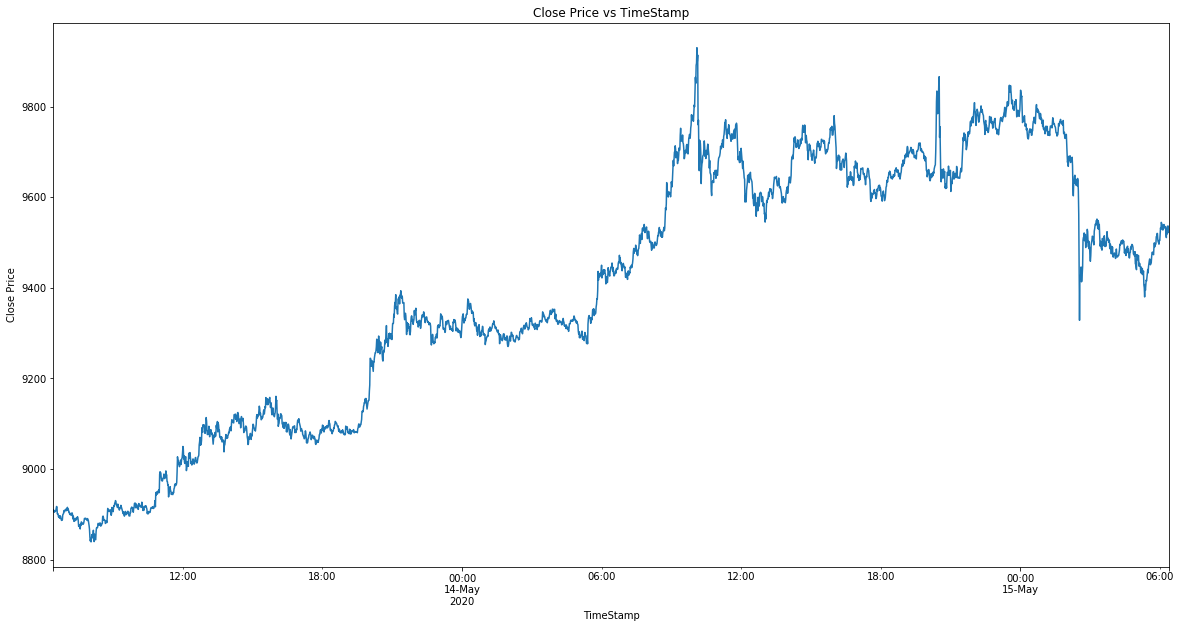

In [163]:
BTC['Close'].plot(figsize=(20,10),title='Close Price vs TimeStamp')
plt.xlabel('TimeStamp') 
plt.ylabel('Close Price') 

Additive Close=Trends+Seasonal+Residual


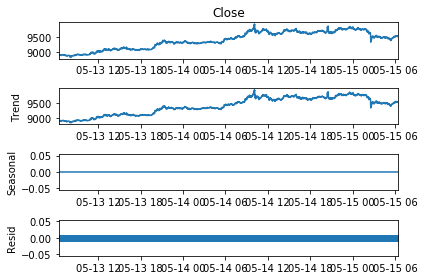

Multplicative Close= Trends*Seasonal*Residual


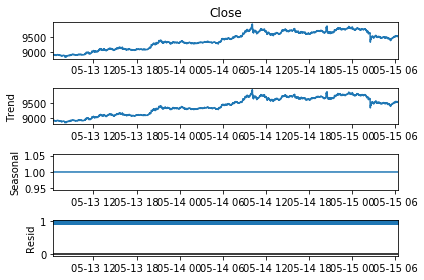

In [164]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

series=BTC['Close']

print("Additive Close=Trends+Seasonal+Residual")
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

print("Multplicative Close= Trends*Seasonal*Residual")
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

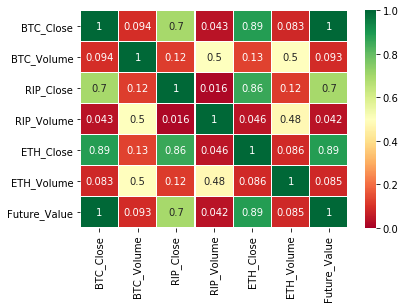

In [282]:
sns.heatmap(combined_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

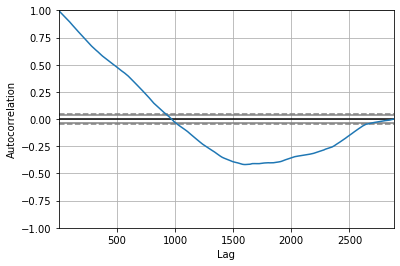

In [268]:
autocorrelation_plot(series)

preprocessing

In [279]:
combined_df = pd.DataFrame()
currencies = ["BTC","RIP","ETH"] 
datasets = [BTC,RIP,ETH]
for i in range(len(currencies)):
    currency=currencies[i]
    df=datasets[i]
    df.rename(columns={"Close": f"{currency}_Close", "Volume": f"{currency}_Volume"}, inplace=True)
    df.set_index("Open time", inplace=True)
    df = df[[f"{currency}_Close", f"{currency}_Volume"]]
    if len(combined_df)==0:
        combined_df=df
    else:  # otherwise, join this data to the main one
        combined_df=combined_df.join(df)
combined_df.fillna(method="ffill", inplace=True) # missing values filled with the previously known values

In [280]:
print("Combined_DF")
combined_df.head()

Combined_DF


BTC_Close  BTC_Volume  RIP_Close  RIP_Volume  ETH_Close  \
Open time                                                                      
2020-05-13 14:05:00    9096.89  140.676203    0.20125     30200.3     195.36   
2020-05-13 14:06:00    9108.99  118.941361    0.20145     42104.3     195.68   
2020-05-13 14:07:00    9108.23  129.643917    0.20140     48787.9     195.68   
2020-05-13 14:08:00    9104.21  122.030087    0.20130    165309.4     195.60   
2020-05-13 14:09:00    9107.00   84.441516    0.20128     84954.3     195.61   

                     ETH_Volume  
Open time                        
2020-05-13 14:05:00  1363.71871  
2020-05-13 14:06:00   980.93042  
2020-05-13 14:07:00   771.98183  
2020-05-13 14:08:00   591.27764  
2020-05-13 14:09:00   571.30343

In [281]:
future_timeline=1 # to what we want to predict short term or long term 
currency="BTC" # which cryptocurrency we are predicting
combined_df['Future_Value']=combined_df[f'{currency}_Close'].shift(-future_timeline)

standaridzation and normalization

In [195]:
def preprocess(df):

    for col in df.columns:  # go through all of the columns
        if col != "Future_Value":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.
    return df

combined_df=preprocess(combined_df)

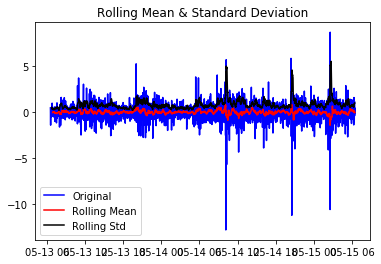

ADF Stastistic: -9.777003
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [196]:
def test_stationarity(x):
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = combined_df['BTC_Close']      
test_stationarity(ts)

spliting into train and validation

In [197]:
times=sorted(combined_df.index.values)
last_5pct=sorted(combined_df.index.values)[-int(0.05*len(times))]
validation_df = combined_df[(combined_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
train_df = combined_df[(combined_df.index < last_5pct)]  

In [198]:
print("Length validation dataset:",len(validation_df))
print("Length train dataset:",len(train_df))

Length validation dataset: 143
Length train dataset: 2730


Getting features for predcitions

In [201]:
feature_length=60  # next 1 min predcition for based on last 1 hour
future_timeline=1 

In [202]:
def features(df):
    sequential_data=[]
    index=[]
    count=0
    prev_days = deque(maxlen=feature_length)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days)==feature_length:
            sequential_data.append([np.array(prev_days), i[-1]]) 
            index.append(df.index.values[count])
        count=count+1
            

    random.shuffle(sequential_data)
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), y,index

train_x, train_y,index_train=features(train_df) 
validation_x, validation_y,index_validation=features(validation_df)

In [203]:
print((validation_x.shape))

(84, 60, 6)


In [204]:
train_x_NN=train_x
validation_x_NN=validation_x
train_y_NN= np.array(train_y) 
validation_y_NN= np.array(validation_y) 

In [205]:
train_x=train_x.reshape(len(train_x),360)
validation_x=validation_x.reshape(len(validation_x),360)

Model

In [206]:
#RBF +Constant kernel
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=24.2)
Log-marginal-likelihood: -7328011.946
Value at Test points [8910.37072578 9387.96172117 9051.30806873 9048.38942738 9077.53775624
 9554.44681637 9265.13634114 9215.5744214  9047.32369804 8946.64533672
 9074.46093246 9097.81241319 9610.38510296 9029.19322597 9094.14926358
 9204.59245433 9290.66146514 9338.99755206 8521.13745136 9064.09751705
 8953.12862662 9392.46867332 9158.614847   9472.34795103 9377.17338941
 9213.06632607 9285.9944441  9003.72669293 9329.18762363 9388.38717456
 9150.19244384 8984.49120118 9352.61682902 9515.69162679 8975.52623743
 9030.78022671 9427.99244341 9502.20617109 8874.17044883 9427.75599962
 9318.38520744 9458.3743523  9535.47636837 9252.85163771 9510.83159836
 9421.45052326 9441.33318999 8959.32532483 9450.08641014 9027.04177822
 9477.25102353 8487.55727581 9197.83063663 8545.72471197 9101.74625147
 9043.04349862 9333.33465854 9607.01943086 8997.10633985 9173.33971097
 9573.55913952 9492.37252098 9186.33880893 

In [208]:
#Matern+Constant kernel
from sklearn.gaussian_process.kernels import Matern
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * Matern(length_scale=26.3, nu=1.5)
Log-marginal-likelihood: -891717.970
Value at Test points [9452.5135957  9472.84411266 9497.36172499 9537.78704751 9488.20339778
 9457.39490777 9399.68608444 9607.81330684 9485.19109483 9441.3945364
 9461.3227274  9555.10669767 9675.74818462 9471.39345585 9534.3811915
 9406.68773627 9596.89159716 9496.8236437  9197.47380433 9557.25655633
 9441.78175203 9583.74885116 9490.20209425 9447.60288048 9538.50792269
 9399.87167074 9590.71640679 9450.32973196 9543.94364126 9519.42327906
 9554.45724679 9457.93167031 9575.97675854 9611.05123467 9497.19614194
 9455.3543828  9639.92827818 9568.85846362 9427.45769151 9496.14579585
 9472.67266095 9460.37219223 9642.85518469 9594.66470383 9611.35891053
 9497.38825626 9504.89367873 9464.8211886  9548.61361742 9486.57803864
 9607.98263081 9211.94918356 9386.00953421 9231.29666233 9507.77385639
 9460.75293632 9528.37670631 9625.22278231 9446.92229073 9569.5654311
 9643.99622533 9571.36850865 9579.18

In [214]:
#DOT Product+Mattern Kernel
from sklearn.gaussian_process.kernels import DotProduct
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * DotProduct() 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GPML kernel: 0.523**2 * DotProduct(sigma_0=2.76)
Log-marginal-likelihood: -947698646200230400.000
Value at Test points [9351.5546875  9394.81933594 9377.125      9393.2109375  9410.39160156
 9352.36328125 9232.89257812 9348.9375     9412.44140625 9416.4296875
 9430.63671875 9383.88476562 9437.5859375  9419.3125     9421.84765625
 9240.12890625 9394.50390625 9408.14550781 9101.875      9390.3046875
 9439.28125    9499.89453125 9398.765625   9382.60546875 9470.9921875
 9220.37890625 9347.390625   9396.06640625 9476.15625    9463.1953125
 9376.0703125  9360.234375   9467.37890625 9423.2578125  9336.3359375
 9456.515625   9422.2421875  9442.65234375 9420.62890625 9457.5625
 9403.734375   9353.68408203 9495.359375   9390.7734375  9444.02832031
 9461.0078125  9406.7421875  9333.44140625 9443.0859375  9345.859375
 9430.3125     9105.75390625 9234.9375     9137.796875   9419.515625
 9418.17773438 9464.1015625  9440.58203125 9449.39648438 9394.3359375
 9495.6328125  9431.8046875  9400.8984375  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [236]:
#Constant+Rational Quadratic Kernels
from sklearn.gaussian_process.kernels import Matern,RationalQuadratic
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale=1.0, alpha=1.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * RationalQuadratic(alpha=0.0284, length_scale=1e-05)
Log-marginal-likelihood: -301146.681
Value at Test points [9409.17427625 9412.85803121 9404.22918087 9410.77880722 9411.63521658
 9409.97046444 9394.17344519 9412.94381902 9412.54496586 9410.23112064
 9412.6369435  9409.56728994 9418.47185685 9412.04208393 9411.76282308
 9391.66937163 9414.54065493 9412.71681175 9361.76977402 9409.40656614
 9409.39797262 9424.99890581 9405.49933756 9410.87763913 9420.61786521
 9394.73143207 9411.88669478 9409.91337709 9423.59740581 9420.54733462
 9410.28264627 9408.02330994 9420.08790396 9413.49313871 9408.88424405
 9412.09036521 9414.43056225 9416.29947014 9410.05568353 9417.77806498
 9413.49452997 9411.25704968 9426.58324698 9415.49345522 9417.77400354
 9419.61381118 9414.76091809 9402.24642651 9421.94865577 9402.66140389
 9415.16937121 9362.58407444 9394.63656442 9365.55950498 9411.833022
 9409.72182597 9422.00287133 9416.66974357 9412.67688683 9416.83632993
 9426.70219904 94

In [237]:
def plot(X,plot1,plot2):#the plotting fucntion in general
    Xi = list(range(len(X)))
    plt.xticks(Xi, X)
    plt.plot(Xi,plot1,marker='o',markersize=5,label = "Actual") 
    plt.plot(Xi,plot2,marker='o',markersize=5,label = "Predicted") 
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title("Time vs Close price") 
    plt.legend()
    plt.show()

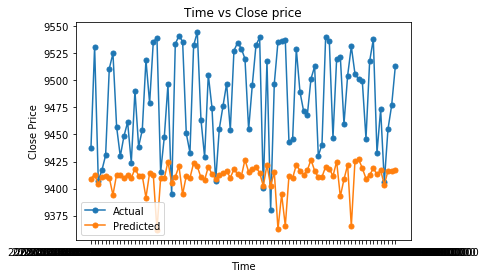

In [238]:
predicted_df=pd.DataFrame(index=index_validation)
predicted_df['Predicted_Future_Value']=y_pred
actual_df=pd.DataFrame(index=index_validation)
actual_df['Future_Value']=validation_y
plot(predicted_df.index.values,actual_df['Future_Value'],predicted_df['Predicted_Future_Value'])

In [217]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

Text(0, 0.5, '$f(x)$')

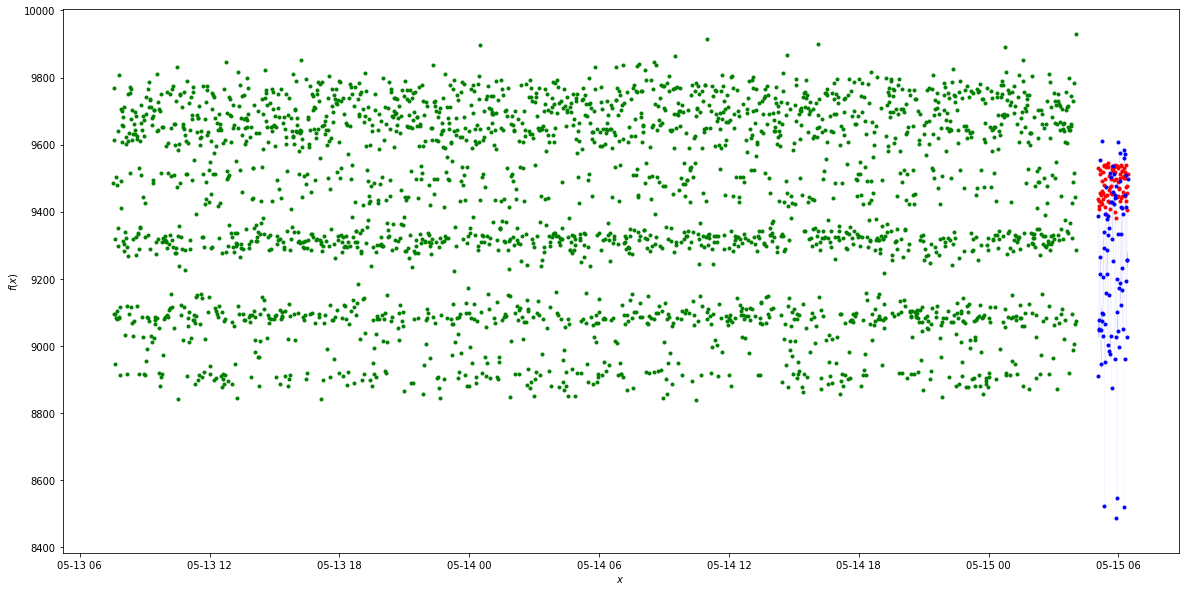

In [221]:
plt.figure(figsize=(20,10))
plt.plot(index_train,train_y,"g.", label='Observations')
plt.plot(index_validation, validation_y, 'r.', label='Prediction')
plt.plot(index_validation, y_pred, 'b.', label='Prediction')
plt.fill(np.concatenate([index_validation, index_validation[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
#plt.legend(loc='upper left')

Other Models

In [248]:
#LINEAR + RIDGE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lr = LinearRegression()
lr.fit(train_x, train_y)

rr = Ridge(alpha=0.01) 
rr.fit(train_x, train_y)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_x, train_y)

ll = Lasso(alpha=0.01) 
ll.fit(train_x, train_y)
ll100 = Lasso(alpha=100) #  comparison with alpha value
ll100.fit(train_x, train_y)


test_score_pred=lr.predict(validation_x)
test_score=np.sqrt(mean_squared_error(validation_y, test_score_pred))
Ridge_test_score_pred=rr.predict(validation_x)
Ridge_test_score=np.sqrt(mean_squared_error(validation_y, Ridge_test_score_pred))
Ridge_test_score100_pred=rr100.predict(validation_x)
Ridge_test_score100=np.sqrt(mean_squared_error(validation_y, Ridge_test_score100_pred))

Lasso_test_score_pred=ll.predict(validation_x)
Lasso_test_score=np.sqrt(mean_squared_error(validation_y, Lasso_test_score_pred))
Lasso_test_score100_pred=ll100.predict(validation_x)
Lasso_test_score100=np.sqrt(mean_squared_error(validation_y, Lasso_test_score100_pred))

print("linear regression test score:", test_score)
print("Ridge regression test score low alpha:", Ridge_test_score)
print("Ridge regression test score high alpha:", Ridge_test_score100)
print("Lasso regression test score low alpha:", Lasso_test_score)
print("Lasso regression test score high alpha:", Lasso_test_score100)

linear regression test score: 132.94318851204847
Ridge regression test score low alpha: 132.94275177240866
Ridge regression test score high alpha: 129.36599288585498
Lasso regression test score low alpha: 132.76778976928102
Lasso regression test score high alpha: 90.81724084471757


In [250]:
#RNN

In [252]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True,input_shape=(train_x_NN.shape[1:])))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x_NN,train_y_NN,epochs=10,batch_size=64)

predicted_data=regressor.predict(validation_x_NN)
rms=np.sqrt(mean_squared_error(validation_y_NN, predicted_data))
print("RMSE with RNN: ",rms)

Epoch 1/10
2671/2671 [==============================] - 29s 11ms/step - loss: 155122032.4214
Epoch 2/10
2671/2671 [==============================] - 28s 10ms/step - loss: 91650938.8004
Epoch 3/10
2671/2671 [==============================] - 28s 10ms/step - loss: 85223698.7705
Epoch 4/10
2671/2671 [==============================] - 27s 10ms/step - loss: 9857350.3586
Epoch 5/10
2671/2671 [==============================] - 28s 10ms/step - loss: 1223465.3046
Epoch 6/10
2671/2671 [==============================] - 27s 10ms/step - loss: 937008.6263
Epoch 7/10
2671/2671 [==============================] - 28s 10ms/step - loss: 631314.9084
Epoch 8/10
2671/2671 [==============================] - 31s 12ms/step - loss: 532859.6135
Epoch 9/10
2671/2671 [==============================] - 28s 10ms/step - loss: 618899.5357
Epoch 10/10
2671/2671 [==============================] - 27s 10ms/step - loss: 485891.2751
RMSE with RNN:  243.37108710842452
